In [48]:
#importing libraries 

import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [49]:
#importing Data...
loc=os.getcwd()+'\ex1\ex1data2.txt'
data = pd.read_csv(loc,header=None,names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [50]:
#Statsical desicriptions...
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [51]:
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [52]:
#defining the cost function...
def computeCost(X,y,theta):
    m= len(X)
    cost =np.power(((X*theta.T)-y),2)
    J = np.sum(cost)/(2*m)
    return J

In [53]:
#Adding first columns to 1...
data.insert(0, 'Ones', 1)

In [54]:
#number of colums
cols = data.shape[1]

In [55]:
#creating X (independent variable)
X = data.iloc[:,0:cols-1]

In [56]:
#(Creating Dependent Variable)
y = data.iloc[:,cols-1:cols]

In [57]:
#Converting it to matrix form...
X = np.matrix(X.values)
y =np.matrix(y.values)
theta = np.matrix(np.zeros(cols-1))

In [58]:
#checking the shape's of matrix's 
X.shape, theta.shape, y.shape

((47, 3), (1, 3), (47, 1))

In [59]:
#creating Function for Gradient_descent...
def Gradient(X,y,theta,alpha,iters):
    #adding a temprory variable which we take intialy as thetha
    temp = np.matrix(np.zeros(theta.shape))
    #Number of Parameter's that will be in the model...
    parameter = theta.ravel().shape[1]
    cost = np.zeros(iters)
    
    #looping over number of iterations...
    for i in range(iters):
        #creating error term...
        error = (X*theta.T) -y
        
        for j in range(parameter):
            #derivative term's for each columns while looping 
            term = np.multiply(error,X[:,j])
            #finding optimise theta...
            temp[0,j]= theta[0,j] - ((alpha/len(X))*np.sum(term))
        theta = temp
        cost[i] = computeCost(X,y,theta)
        
    return theta , cost    
    
    

In [60]:
alpha = 0.01
iters = 1000

In [61]:
Gradient(X,y,theta,alpha,iters)

(matrix([[-1.04077503e-16,  8.78503652e-01, -4.69166570e-02]]),
 array([0.4805491 , 0.47198588, 0.46366462, 0.45557814, 0.44771948,
        0.44008189, 0.43265881, 0.42544389, 0.41843096, 0.41161404,
        0.40498735, 0.39854524, 0.39228228, 0.38619317, 0.38027278,
        0.37451612, 0.36891839, 0.36347488, 0.35818107, 0.35303254,
        0.34802503, 0.34315438, 0.33841659, 0.33380775, 0.32932407,
        0.3249619 , 0.32071767, 0.31658793, 0.31256934, 0.30865863,
        0.30485268, 0.30114841, 0.29754287, 0.29403318, 0.29061655,
        0.28729027, 0.28405173, 0.28089837, 0.27782772, 0.27483739,
        0.27192505, 0.26908845, 0.26632541, 0.26363379, 0.26101154,
        0.25845666, 0.25596722, 0.25354134, 0.25117719, 0.248873  ,
        0.24662705, 0.24443769, 0.24230329, 0.24022228, 0.23819315,
        0.23621442, 0.23428466, 0.23240248, 0.23056652, 0.22877549,
        0.22702811, 0.22532316, 0.22365943, 0.22203576, 0.22045104,
        0.21890417, 0.21739409, 0.21591977, 0.214480

In [62]:
g, cost = Gradient(X, y, theta, alpha, iters)

In [63]:
predicted_value=np.multiply(g[:,0],X[:,0]) + np.multiply(g[:,1],X[:,1]) +np.multiply(g[:,2],X[:,2])

In [64]:
computeCost(X,y,g)

0.13070336960771892

In [65]:
#calculating the standard error 
def squared_error(y,predicted_value):
    return sum((y - predicted_value).T * (y - predicted_value))
squared_error(y,predicted_value)


matrix([[12.28611674]])

In [66]:
#calculating value of R^2.
squared_error_regr = squared_error(y,predicted_value)
squared_error_y_mean = squared_error(y,y.mean())
coefficient_of_determination=  1 - (squared_error_regr/squared_error_y_mean)

coefficient_of_determination

matrix([[0.73291051]])

Text(0.5,1,'Error vs. Training Epoch')

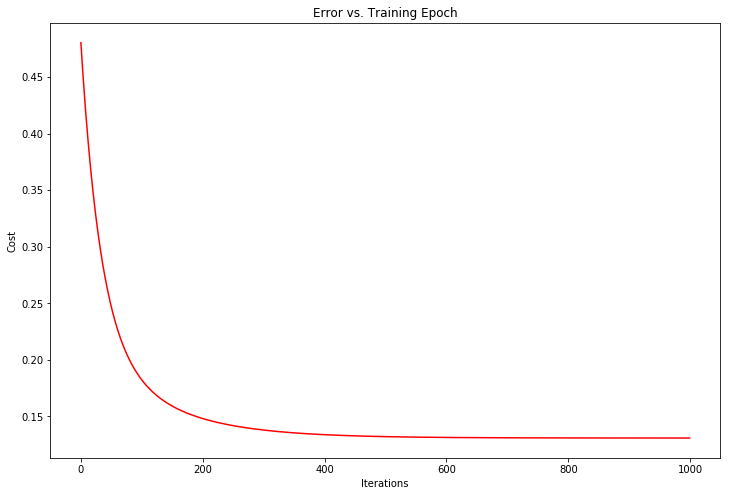

In [67]:

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')